In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train_df = pd.read_csv("../data/ais_train.csv", sep="|")
train_df["time"] = pd.to_datetime(train_df["time"])
train_df.tail()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b
1522064,2024-05-07 23:59:08,336.0,14.3,5,337,0,05-07 23:00,38.98635,-75.13275,62080cff66fc0a8e43c6123a,61d38528b7b7526e1adf3e6f


In [6]:
# A few portIds are missing
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522065 entries, 0 to 1522064
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   time       1522065 non-null  datetime64[ns]
 1   cog        1522065 non-null  float64       
 2   sog        1522065 non-null  float64       
 3   rot        1522065 non-null  int64         
 4   heading    1522065 non-null  int64         
 5   navstat    1522065 non-null  int64         
 6   etaRaw     1522065 non-null  object        
 7   latitude   1522065 non-null  float64       
 8   longitude  1522065 non-null  float64       
 9   vesselId   1522065 non-null  object        
 10  portId     1520450 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 127.7+ MB


In [7]:
# latitudes between [-47.5, 70.5]
# longitudes between [-167.5, 178.8]
train_df.describe()

,time,cog,sog,rot,heading,navstat,latitude,longitude
count,1522065,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06
mean,2024-03-06 03:20:23.657231360,1.782494e+02,6.331703e+00,5.054561e-01,1.762737e+02,2.092604e+00,3.658497e+01,1.153646e+01
min,2024-01-01 00:00:25,0.000000e+00,0.000000e+00,-1.270000e+02,0.000000e+00,0.000000e+00,-4.753287e+01,-1.675409e+02
25%,2024-02-03 02:59:19,7.820000e+01,0.000000e+00,0.000000e+00,7.500000e+01,0.000000e+00,3.451683e+01,-5.212810e+00
50%,2024-03-07 12:34:57,1.838000e+02,5.000000e-01,0.000000e+00,1.800000e+02,0.000000e+00,4.223370e+01,4.234350e+00
75%,2024-04-07 07:37:36,2.690000e+02,1.410000e+01,0.000000e+00,2.650000e+02,5.000000e+00,5.135197e+01,1.883715e+01
max,2024-05-07 23:59:08,3.600000e+02,1.023000e+02,1.280000e+02,5.110000e+02,1.500000e+01,7.055720e+01,1.788054e+02
std,NaN,1.076785e+02,7.539364e+00,1.760916e+01,1.070860e+02,2.411965e+00,2.290488e+01,6.871572e+01


In [8]:
train_df.duplicated(["vesselId"]).value_counts()

True     1521377
False        688
Name: count, dtype: int64

#### Missing / default values

In [9]:
missing_port_vessels = train_df[pd.isna(train_df.portId)].vesselId.unique()

In [10]:
for vesselId, group in (
    train_df[train_df["vesselId"].isin(missing_port_vessels)]
    .sort_values("vesselId")
    .groupby("vesselId")
):
    num_missing = group["portId"].isna().sum()
    print(f"Vessel {vesselId} missing {num_missing} out of {len(group)} ports")

Vessel 61e9f393b937134a3c4bfd9d missing 2 out of 683 ports
Vessel 61e9f3c3b937134a3c4bfeb3 missing 32 out of 2101 ports
Vessel 61e9f3c9b937134a3c4bfef1 missing 63 out of 3709 ports
Vessel 61e9f3c9b937134a3c4bfef5 missing 5 out of 1110 ports
Vessel 61e9f3e6b937134a3c4bff6b missing 1 out of 1235 ports
Vessel 61e9f403b937134a3c4c0011 missing 81 out of 1316 ports
Vessel 61e9f413b937134a3c4c0057 missing 110 out of 7503 ports
Vessel 61e9f432b937134a3c4c0119 missing 25 out of 1614 ports
Vessel 61e9f438b937134a3c4c0145 missing 20 out of 1666 ports
Vessel 61e9f443b937134a3c4c0197 missing 224 out of 2375 ports
Vessel 61e9f462b937134a3c4c0253 missing 1 out of 6234 ports
Vessel 61e9f464b937134a3c4c0263 missing 1 out of 5761 ports
Vessel 61e9f465b937134a3c4c0269 missing 347 out of 6145 ports
Vessel 61e9f466b937134a3c4c0275 missing 1 out of 7003 ports
Vessel clh6aqawa0006gh0zje911dl3 missing 691 out of 5702 ports
Vessel clh6aqawa0007gh0z9h6zi9bo missing 11 out of 6665 ports


In [11]:
train_df[pd.isna(train_df.portId)].shape

(1615, 11)

In [12]:
train_df.query("cog == 360")["sog"]

39           0.0
166          0.0
330          0.0
505          0.0
667          0.0
           ...  
1511339    102.3
1513322    102.3
1519721      0.1
1521456      0.1
1521950    102.3
Name: sog, Length: 5858, dtype: float64

In [13]:
# Seems like sog is either 0 or 102.3 (not available) when cog=360
bins = pd.IntervalIndex.from_tuples(
    [(float("-inf"), 0.1), (0.1, 102.2), (102.2, float("inf"))]
)
print(pd.cut(train_df.query("cog >= 360")["sog"], bins=bins).value_counts(sort=False))
print(train_df.query("sog >= 102")["sog"].value_counts())

sog
(-inf, 0.1]     5438
(0.1, 102.2]      33
(102.2, inf]     387
Name: count, dtype: int64
sog
102.3    393
102.2     12
Name: count, dtype: int64


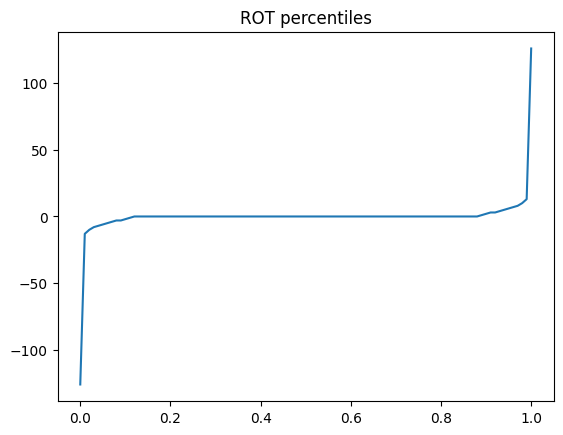

In [14]:
train_df.query("-126 <= rot <= 126")["rot"].quantile(np.arange(0.0, 1.01, 0.01)).plot()
plt.title("ROT percentiles")
plt.show()

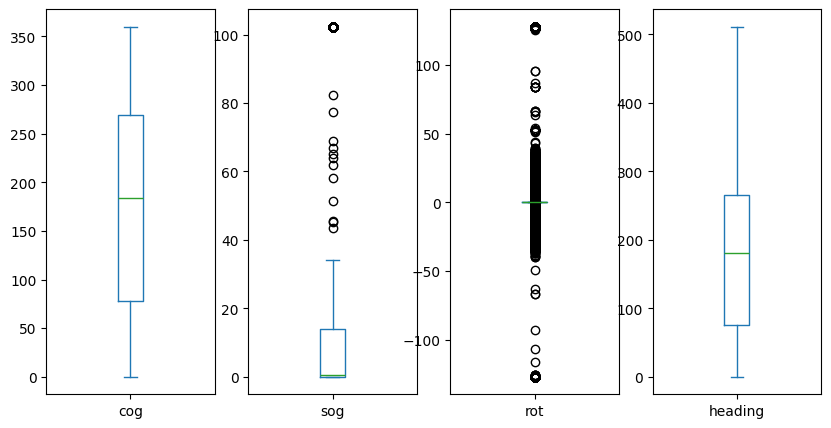

In [15]:
train_df[["cog", "sog", "rot", "heading"]].plot.box(subplots=True, figsize=(10, 5))
plt.show()

In [16]:
# Most rots are 0 (which makes sense since boats are usually not turning)
train_df.query("-1 <= rot <= 1")["rot"].value_counts()

rot
 0    1157035
 1      17304
-1      16987
Name: count, dtype: int64

In [17]:
train_df.query("rot > 126 | rot < -126")["rot"].value_counts()

rot
 127    11339
-127    11042
 128     5563
Name: count, dtype: int64

In [18]:
train_df.query("heading > 359 | heading < 0")["heading"].value_counts()

heading
511    4895
483       1
Name: count, dtype: int64

#### Hist and scatter plots

In [ ]:
train_df["navstat"].value_counts().plot(kind="bar")

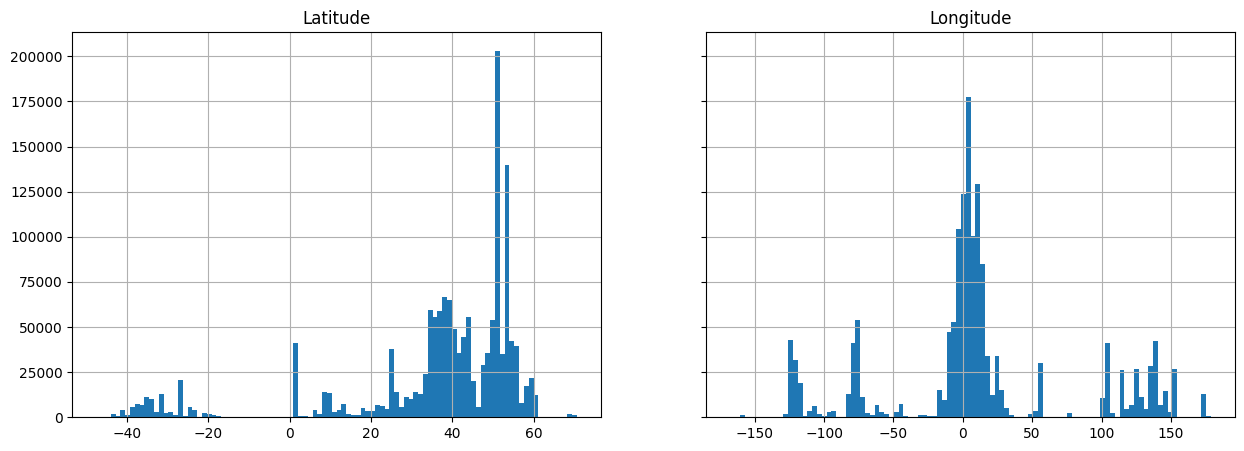

In [19]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

lat_ax = train_df.latitude.hist(ax=ax[0], bins=100)
lat_ax.set_title("Latitude")

lng_ax = train_df.longitude.hist(ax=ax[1], bins=100)
lng_ax.set_title("Longitude")

plt.show()

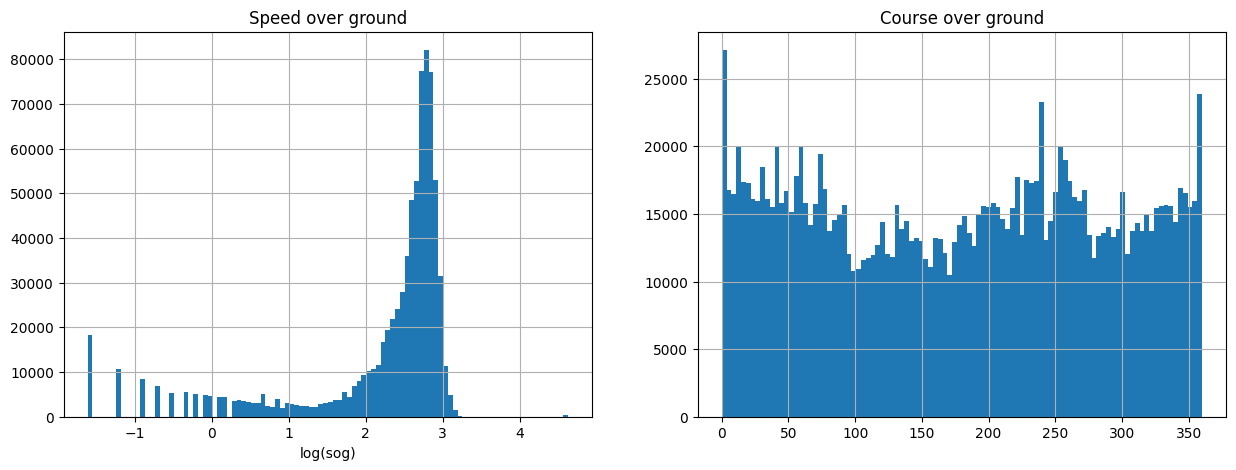

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

lat_ax = train_df.query("sog > 0.1").sog.apply(np.log).hist(ax=ax[0], bins=100)
lat_ax.set_xlabel("log(sog)")
lat_ax.set_title("Speed over ground")

lng_ax = train_df.cog.hist(ax=ax[1], bins=100)
lng_ax.set_title("Course over ground")

plt.show()

In [21]:
train_df["navstat"].value_counts()

navstat
0     782099
5     605831
1     129515
2       2081
8        948
15       670
6        521
4        232
3        161
11         2
13         1
12         1
14         1
7          1
9          1
Name: count, dtype: int64

In [22]:
from pandas.plotting import scatter_matrix

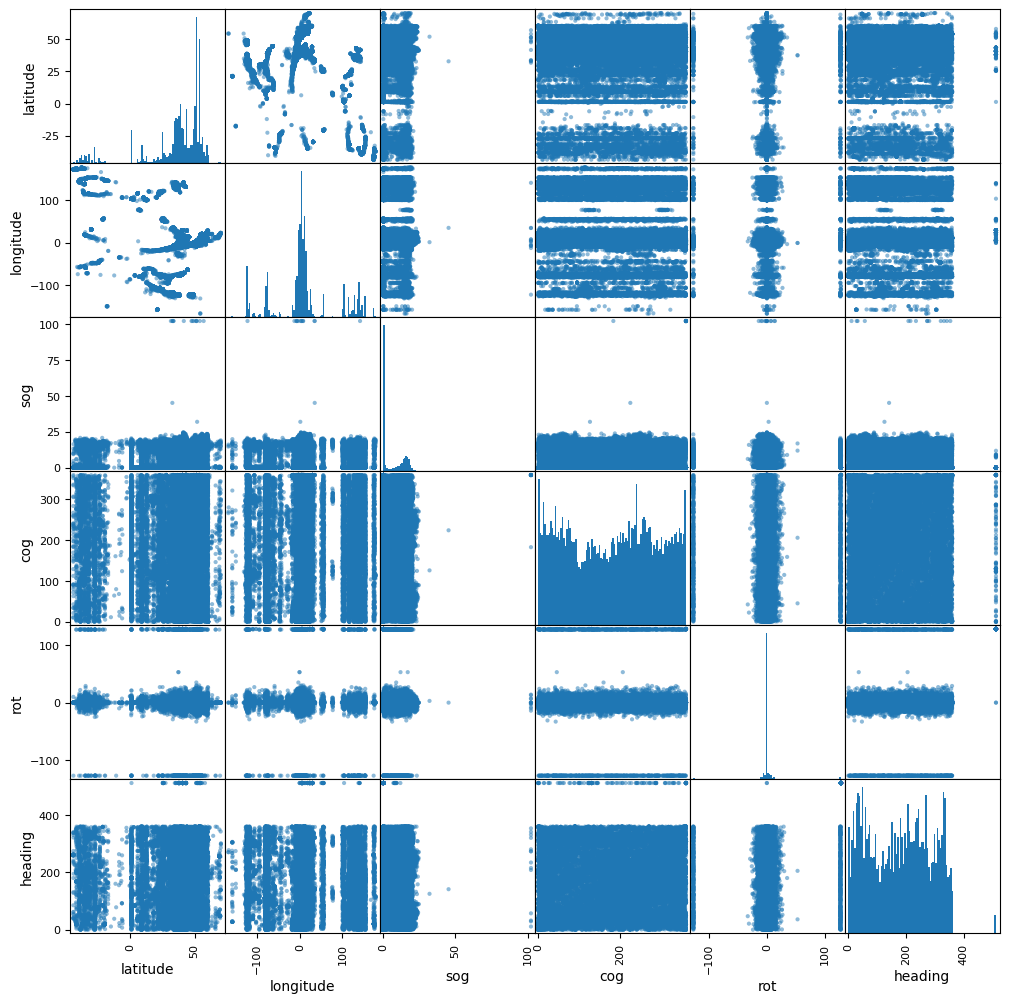

In [23]:
features = ["latitude", "longitude", "sog", "cog", "rot", "heading"]
scatter_matrix(
    train_df[features].sample(50000), figsize=(12, 12), hist_kwds={"bins": 100}
)
plt.show()

In [24]:
import geopandas as gpd

In [25]:
MAP_LAND_PATH = "../data/land_and_ocean/ne_10m_land.zip"  # Path to the land zip file
MAP_OCEAN_PATH = "../data/land_and_ocean/ne_10m_ocean.zip"  # Path to the ocean zip file
land_world = gpd.read_file(MAP_LAND_PATH)
ocean_world = gpd.read_file(MAP_OCEAN_PATH)

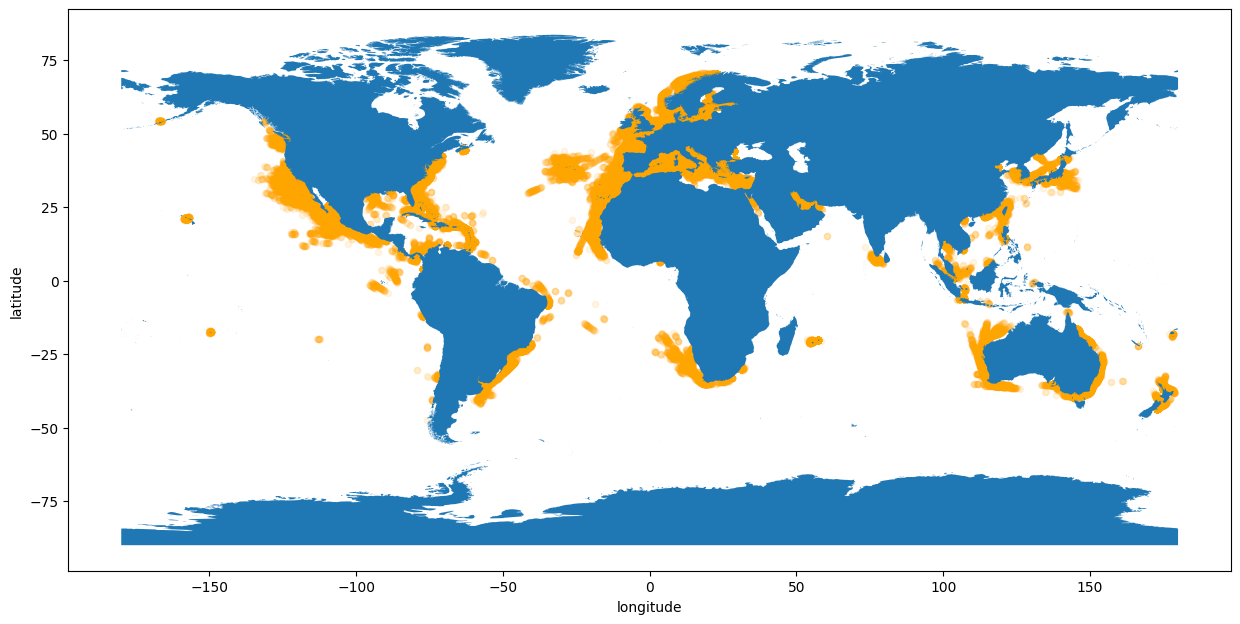

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
train_df.plot.scatter(x="longitude", y="latitude", ax=ax, alpha=0.1, c="orange")
land_world.plot(ax=ax)
plt.show()

## Grouped by vessel ID

In [27]:
train_df_grouped = train_df.sort_values(by=["vesselId", "time"])
train_df_grouped.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
131115,2024-01-12 14:07:47,308.1,17.1,-6,316,0,01-08 06:00,7.50361,77.58340,61e9f38eb937134a3c4bfd8b,61d376b393c6feb83e5eb50c
131279,2024-01-12 14:31:00,307.6,17.3,5,313,0,01-14 23:30,7.57302,77.49505,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546
131514,2024-01-12 14:57:23,306.8,16.9,5,312,0,01-14 23:30,7.65043,77.39404,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546
131696,2024-01-12 15:18:48,307.9,16.9,6,313,0,01-14 23:30,7.71275,77.31394,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546
131885,2024-01-12 15:39:47,307.0,16.3,7,313,0,01-14 23:30,7.77191,77.23585,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546


In [28]:
train_df_grouped["time_diff"] = train_df_grouped.groupby("vesselId")["time"].diff()

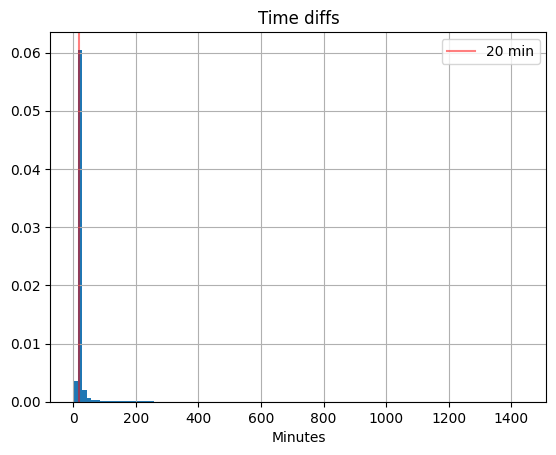

In [29]:
# Most time diffs are around 20 min, but there are a few very long time diffs that need to be handled carefully
(train_df_grouped["time_diff"].dt.seconds / 60).hist(bins=100, density=True)
plt.axvline(x=20, c="red", alpha=0.5, label="20 min")
plt.title("Time diffs")
plt.xlabel("Minutes")
plt.legend()
plt.show()

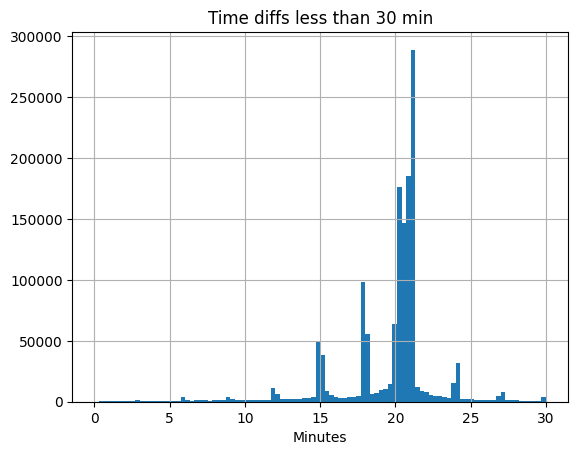

In [30]:
(
    train_df_grouped[train_df_grouped["time_diff"] < pd.Timedelta(30 * 60, unit="s")][
        "time_diff"
    ].dt.seconds
    / 60
).hist(bins=100)
plt.title("Train: Time diffs less than 30 min")
plt.xlabel("Minutes")
plt.show()

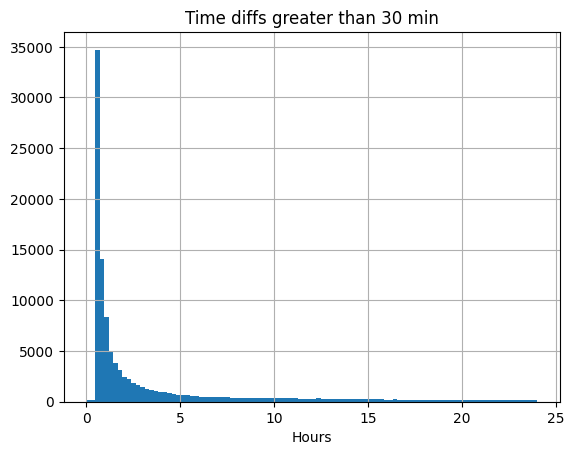

In [31]:
(
    train_df_grouped[train_df_grouped["time_diff"] > pd.Timedelta(30 * 60, unit="s")][
        "time_diff"
    ].dt.seconds
    / 3600
).hist(bins=100)
plt.title("Train: Time diffs greater than 30 min")
plt.xlabel("Hours")
plt.show()

In [37]:
test_df = pd.read_csv("../data/ais_test.csv")
test_df["time"] = pd.to_datetime(test_df["time"])
test_df.tail()

,ID,vesselId,time,scaling_factor
51734,51734,61e9f3a8b937134a3c4bfdf3,2024-05-12 23:59:58,0.1
51735,51735,61e9f3b4b937134a3c4bfe77,2024-05-12 23:59:58,0.1
51736,51736,61e9f46cb937134a3c4c02b7,2024-05-12 23:59:58,0.1
51737,51737,61e9f465b937134a3c4c0269,2024-05-12 23:59:58,0.1
51738,51738,61e9f3adb937134a3c4bfe39,2024-05-12 23:59:58,0.1


In [38]:
test_df_grouped = test_df.sort_values(["vesselId", "time"])
test_df_grouped["time_diff"] = test_df_grouped.groupby("vesselId")["time"].diff()

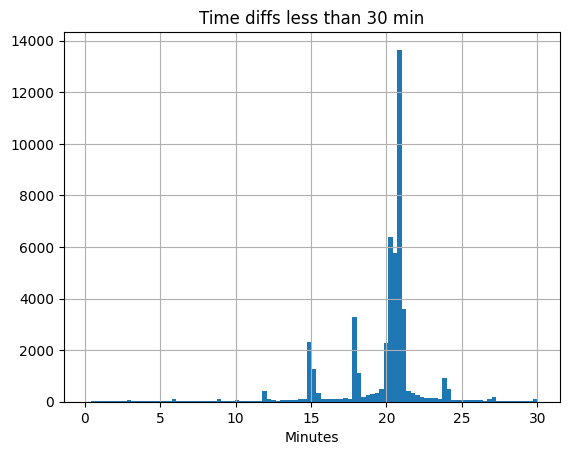

In [39]:
(
    test_df_grouped[test_df_grouped["time_diff"] < pd.Timedelta(30 * 60, unit="s")][
        "time_diff"
    ].dt.seconds
    / 60
).hist(bins=100)
plt.title("Test: Time diffs less than 30 min")
plt.xlabel("Minutes")
plt.show()

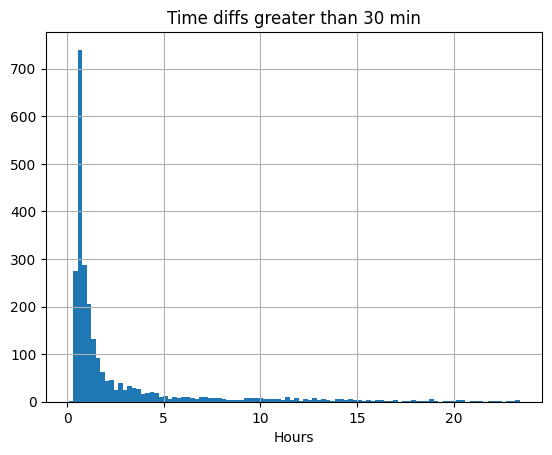

In [40]:
(
    test_df_grouped[test_df_grouped["time_diff"] > pd.Timedelta(30 * 60, unit="s")][
        "time_diff"
    ].dt.seconds
    / 3600
).hist(bins=100)
plt.title("Test: Time diffs greater than 30 min")
plt.xlabel("Hours")
plt.show()